In [307]:
# multi foci outlier
import OMEGA_core as om
import timeit
from numba import jit
import numpy as np
from skimage import morphology, exposure
from scipy.interpolate import splprep, splev, RectBivariateSpline
import tifffile
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob, os
import pdb, pickle, time
import shutil
from scipy import stats
import scipy.ndimage as ndi
import pickle as pk


In [34]:
# load dataframe
# load dataframe
df = pd.read_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/rep1_spikein_curated.xls')
global_df = pd.read_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/global_metrics_reoriented_v2.0.xls')
global_df['MEAN_puncta_amplitude'] = global_df['MEAN_Puncta_mean_fl_intensity']/global_df['MEAN_mean']

# load data
dest_folder = '/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/NMF_output/'
reshaped = np.load(dest_folder+'NMF_regrouped.npy')
h = np.load(dest_folder+'NMF_basis.npy')
w = np.load(dest_folder+'NMF_encoding.npy')
snf_data = pk.load(open('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/SNF_output/SNF_output.pk','rb'))
n_components = 20
positions = snf_data['positions']
g = snf_data['network']
pos = snf_data['embedding']
graph = snf_data['composite_graph']
func_tab = pd.read_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/references/COG/func_annot.xlsx',index_col='Functional_category')

gematria_input = np.load('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/packed_rep1_spikein.npy')
gematria_input_filtered = gematria_input[df['Original_index'].values]
graph_data = snf_data['composite_graph']

# map entry ids of the original and selected entries
SAFE_entry_id = df.index[df['SAFE_input']==1].values

In [42]:
global_df_reindexed = global_df.set_index('key')

In [316]:
global_df_reindexed['CV'] = global_df_reindexed['MEAN_standard_deviation']/global_df_reindexed['MEAN_mean']

In [327]:
gem_cv

NameError: name 'gem_cv' is not defined

In [328]:
from scipy.stats import skew, kurtosis
original_idx = df['Original_index']
average_comparison = []
for i,k in enumerate(df['key'].values):
    gem_input = gematria_input[original_idx[i]]
    gem_skew = [skew(x) for x in gem_input]
    gem_kurt = [kurtosis(x) for x in gem_input]
    gem_cv = [np.std(x)/np.mean(x) for x in gem_input]
    if k in global_df['key'].values:
        raw_skew, raw_kurt,raw_cv = global_df_reindexed.loc[k,['MEAN_cell_skewness','MEAN_cell_kurtosis','CV']].values.astype(float)
        average_comparison.append([k,np.mean(gem_skew),np.std(gem_skew),np.mean(gem_kurt),np.std(gem_kurt),np.mean(gem_cv), raw_skew, raw_kurt,raw_cv])

In [329]:
average_comparison = pd.DataFrame(average_comparison, columns=['key',
                                                               'MEAN_gem_skewness','STD_gem_skewness',
                                                               'MEAN_gem_kurtosis','STD_gem_kurtosis',
                                                               'MEAN_gem_cv',
                                                               'MEAN_cell_skewness','MEAN_cell_kurtosis','RAW_cv'])

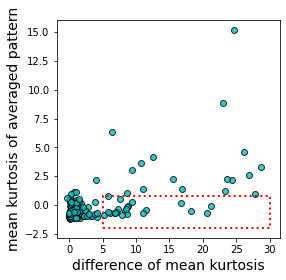

In [330]:
import matplotlib.patches as patches
x1=average_comparison['MEAN_gem_skewness'].values.astype(float)
y1=average_comparison['MEAN_cell_skewness'].values.astype(float)
x2=average_comparison['MEAN_gem_kurtosis'].values.astype(float)
y2=average_comparison['MEAN_cell_kurtosis'].values.astype(float)
x3=average_comparison['MEAN_gem_cv'].values.astype(float)
y3=average_comparison['RAW_cv'].values.astype(float)
 
fig=plt.figure(figsize=(4,4))
ax=fig.add_subplot()
ax.scatter(y2-x2,x2,fc='c',ec='black',alpha=0.8)
rect = patches.Rectangle((5,-2), 25, 2.8, lw=2, ec='r', 
                         fc='None',alpha=1,ls=':')
ax.add_patch(rect)
ax.set_xlabel('difference of mean kurtosis',fontsize=14)
ax.set_ylabel('mean kurtosis of averaged pattern',fontsize=14)

#plt.yscale('log')
#plt.xscale('log')
plt.savefig('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/gem_outlier/kurtosis_based.png',dpi=120,bbox_inches='tight')

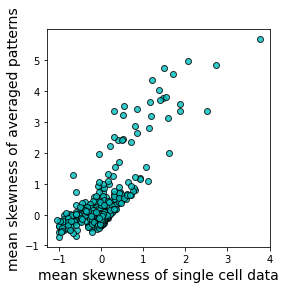

In [311]:
import matplotlib.patches as patches
x1=average_comparison['MEAN_gem_skewness'].values.astype(float)
y1=average_comparison['MEAN_cell_skewness'].values.astype(float)
x2=average_comparison['MEAN_gem_kurtosis'].values.astype(float)
y2=average_comparison['MEAN_cell_kurtosis'].values.astype(float)
 
fig=plt.figure(figsize=(4,4))
ax=fig.add_subplot()
ax.scatter(x1,y1,fc='c',ec='black',alpha=0.8)
rect = patches.Rectangle((5,-2), 25, 2.8, lw=2, ec='r', 
                         fc='None',alpha=1,ls=':')
#ax.add_patch(rect)
ax.set_xlabel('mean skewness of single cell data',fontsize=14)
ax.set_ylabel('mean skewness of averaged patterns',fontsize=14)

#plt.yscale('log')
#plt.xscale('log')
plt.savefig('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/gem_outlier/skewness.png',dpi=120,bbox_inches='tight')

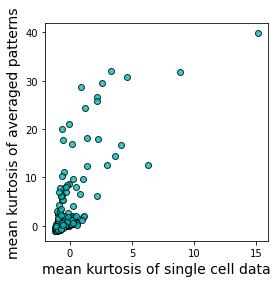

In [313]:
import matplotlib.patches as patches
x1=average_comparison['MEAN_gem_skewness'].values.astype(float)
y1=average_comparison['MEAN_cell_skewness'].values.astype(float)
x2=average_comparison['MEAN_gem_kurtosis'].values.astype(float)
y2=average_comparison['MEAN_cell_kurtosis'].values.astype(float)
 
fig=plt.figure(figsize=(4,4))
ax=fig.add_subplot()
ax.scatter(x2,y2,fc='c',ec='black',alpha=0.8)
rect = patches.Rectangle((5,-2), 25, 2.8, lw=2, ec='r', 
                         fc='None',alpha=1,ls=':')
#ax.add_patch(rect)
ax.set_xlabel('mean kurtosis of single cell data',fontsize=14)
ax.set_ylabel('mean kurtosis of averaged patterns',fontsize=14)

#plt.yscale('log')
#plt.xscale('log')
plt.savefig('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/gem_outlier/kurtosis.png',dpi=120,bbox_inches='tight')

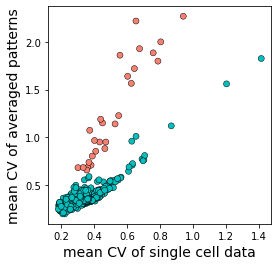

In [375]:
import matplotlib.patches as patches
x3=average_comparison['MEAN_gem_cv'].values.astype(float)
y3=average_comparison['RAW_cv'].values.astype(float)
average_comparison['outlier']=((y3/x3)>1.8)*1
colors = ['c','salmon']
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

fig=plt.figure(figsize=(4,4))
ax=fig.add_subplot()
sns.scatterplot(data=average_comparison,x='MEAN_gem_cv',y='RAW_cv',hue='outlier',legend=False,ec='black',lw=0.5)
                
ax.set_xlabel('mean CV of single cell data',fontsize=14)
ax.set_ylabel('mean CV of averaged patterns',fontsize=14)

#plt.yscale('log')
#plt.xscale('log')
plt.savefig('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/gem_outlier/CV.png',dpi=120,bbox_inches='tight')

In [395]:
from matplotlib.gridspec import GridSpec as gs

def format_names(name_list):
    new_names = []
    for n in name_list:
        if n.startswith('MSMEG'):
            new_names.append(n.split('_')[1])
        elif n in ['mScarlet','mNeonGreen']:
            new_names.append(n)
        else:
            new_names.append(n[0].capitalize()+n[1:])
    return new_names

subset = average_comparison[average_comparison['outlier']==1]['key'].values
for k in subset:
    data = pk.load(open('/Volumes/Junhao_data_Rubin_Lab/MSR_submission1_archive_202103/MSR_update_20201118/{}/{}_miscellaneous_data.pk'.format(k,k),'rb'))
    name,locus = df[df['key']==k][['name','locus']].values[0]
    if name != locus:
        label = '{} | {}'.format(locus, format_names([name])[0])
    else:
        label = locus
    included = np.where(data['is_outlier']==0)[0]
    l = data['lengths']
    demograph = data['FITC']['padded_axial_data'][included][np.argsort(l[included])]
    fig=plt.figure(figsize=(4.5,5))
    grids = gs(1,9)
    ax1 = fig.add_subplot(grids[:,:6])
    ax2 = fig.add_subplot(grids[:,6:9])
    ax1.imshow(demograph,aspect='auto')
    ax2.imshow(plt.imread('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/figures/LRFP/LRFP_{}.png'.format(k))[4:-4,1:-1,:],aspect='auto')
    ax1.set_yticks([])
    ax1.set_title('Demograph')
    ax2.axis('off')
    ax1.set_xticks([0,127,255,383,511])
    ax1.set_xticklabels([6,3,0,3,6],fontsize=12)
    ax1.set_xlabel('distance from center [μm]',fontsize=14)
    ax1.set_title(label,fontsize=14)
    ax2.set_title('length-binned',fontsize=14)
    plt.savefig('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/gem_outlier/{}.png'.format(k),dpi=80,bbox_inches='tight')
    plt.close()

In [391]:
def genes2network(fg_list,totallist,filename=None,annotate = True, adjust=False,zoomin=False):
    import networkx as nx
    import adjustText
    fig=plt.figure(figsize=(4,4))
    ax=fig.add_subplot()
    ax.scatter(positions[0],positions[1],fc='lightgrey',ec='None',s=10,alpha=0.5)
    edges = nx.draw_networkx_edges(g,pos=pos,edge_color='silver',alpha=0.05, width=0.05, ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
    if zoomin:
        ax.set_xlim(-1.2,-0.2)
        ax.set_ylim(-0.2,0.8)
    texts = []
    for l in totallist:
        idx,name = df[df['locus']==l][['Original_index','name']].values[0]
        if not name.startswith('MSMEG_'):
            name = name[0].capitalize()+name[1:]
        if l in fg_list:
            ax.scatter(positions[0,idx],positions[1,idx],fc='salmon',ec='black',s=150)
            if annotate:
                texts.append(ax.text(positions[0,idx],positions[1,idx],name,fontsize=12))
        else:
            ax.scatter(positions[0,idx],positions[1,idx],fc='c',ec='black',s=50,alpha=0.5)
    if adjust:
        adjustText.adjust_text(texts,arrowprops=dict(arrowstyle='-', color='black'),
                       force_points=(0.5,1),
                       force_text=(0.9,1),
                       expand_points=(1.3,1.5))
    if filename is not None:
        plt.savefig(filename,dpi=120,bbox_inches='tight')
        plt.close()

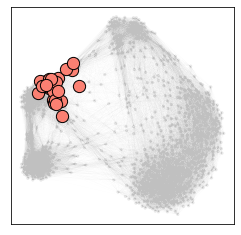

In [434]:
subset=average_comparison[average_comparison['outlier']==1]['key'].values
locus_list = [x[-10:] for x in subset]
genes2network(locus_list,locus_list,adjust=True,annotate=False,zoomin=False)

In [435]:
genes2network(['MSMEG_0903','MSMEG_4283','MSMEG_4323'],locus_list,'/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/gem_outlier/pyruvate_deh.png',
              adjust=True,annotate=True,zoomin=True)

In [389]:
genes = [1736,5239,2743,3655,5800,251,156]
genes2network(['MSMEG_{}'.format(str(x).zfill(4)) for x in genes],
              locus_list,'/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/gem_outlier/subpolar_asymmetric.png',
              adjust=True,annotate=True,zoomin=True)

In [408]:
cog=pd.read_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/references/COG/msm_cog_filtered.xls')
func_tab = pd.read_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/references/COG/func_annot.xlsx',index_col='Functional_category')
kegg=pd.read_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/start_over_once_more/references/msm_kegg.xls')

In [414]:
import xlsxwriter as xls
cog_annot=[]
for l in locus_list:
    if l in cog['locus'].values:
        cog_annot.append(' | '.join(list(np.unique(cog[cog['locus']==l]['Functional_category'].values))))
    else:
        cog_annot.append('N/A')
        
        
folder='/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/gem_outlier/'
gem_file = xls.Workbook('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/gem_outlier/outlier.xlsx')
reindex_df = df.set_index('key').copy()
worksheet = gem_file.add_worksheet('Datasheet_1')
worksheet.set_row(0,45)
worksheet.write('A1','MSR_index')
worksheet.write_column('A2',subset)
worksheet.write('B1','locus')
worksheet.write_column('B2',locus_list)
worksheet.write('C1','Name')
worksheet.write_column('C2',reindex_df.loc[subset]['name'].values)
worksheet.write('D1','Demograph | Length-binned pattern')
for i,l in enumerate(subset):
    worksheet.insert_image('D{}'.format(i+2),
                           folder+'{}.png'.format(l),{'x_scale': 0.3, 'y_scale': 0.3})
gem_file.close()

In [399]:


    #worksheet.set_column('A:A',.format(c,c),10)
    for i,x in enumerate(['{}1'.format(j) for j in 'BCDEFGHIJKLMNOPQRSTU']):
        c=x[0]
        worksheet.set_column('{}:{}'.format(c,c),11)
        worksheet.insert_image(x,folder+'{}.png'.format(i+1),{'x_scale': 0.6, 'y_scale': 0.6})
        worksheet.write_column(c+'2',GEMATRIA_NMF[:,l,i])

,Unnamed: 0,locus,NCBI_assembly,protein_id,length,coordinates,length_of_coordinates,COG,reserved,COG membership class,PSI-BLAST bit score,eval,COG profile length,Protein footprint coordinates,Functional_category
104,1152,MSMEG_0156,GCF_000015005.1,YP_884572.1,308,1-308,308,COG0583,COG0583,0,134.0,2.830000e-37,297,1-271,K


In [428]:
cog_func_reindex = func_tab.loc

In [430]:
func_tab

,Color_code,Annotation
Functional_category,,
J,FCCCFC,"Translation, ribosomal structure and biogenesis"
A,FCDCFC,RNA processing and modification
K,FCDCEC,Transcription
L,FCDCDC,"Replication, recombination and repair"
B,FCDCCC,Chromatin structure and dynamics
D,FCFCDC,"Cell cycle control, cell division, chromosome ..."
Y,FCFCCC,Nuclear structure
V,FCFCBC,Defense mechanisms
T,FCFCAC,Signal transduction mechanisms
